In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('/content/sample_data/diabetes (1).csv') # reading data file

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info() # all are numerical fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data['Outcome'].unique() # only 2 values- 0 and 1

array([1, 0])

In [ ]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
data['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


In [ ]:
data.duplicated().sum() # no duplicates found

0

# 1. Finding missing values

In [ ]:
data.isna().sum() # no missing values found in the data set

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# getting the index of datas with value 0
data[(data['BloodPressure']==0)  | (data['SkinThickness']==0) | (data['Insulin']==0) | (data['BMI']==0) | (data['Glucose']==0)].index

Index([  0,   1,   2,   5,   7,   9,  10,  11,  12,  15,
       ...
       754, 756, 757, 758, 759, 761, 762, 764, 766, 767],
      dtype='int64', length=376)

In [ ]:
# dropping those values
data.drop(data[(data['BloodPressure']==0)  | (data['SkinThickness']==0) | (data['Insulin']==0) | (data['BMI']==0) | (data['Glucose']==0)].index, inplace=True)

In [ ]:
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


# 2. Outliers

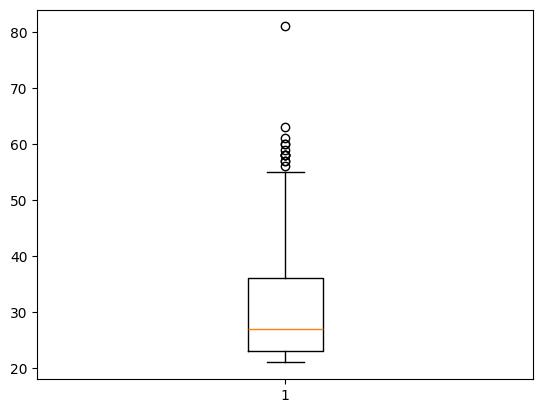

In [ ]:
plt.boxplot(data['Age'])
plt.show() # not removing the outlier as it is relevant for our data

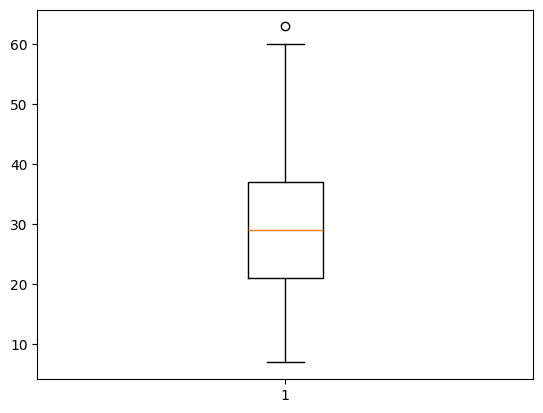

In [ ]:
plt.boxplot(data['SkinThickness'])
plt.show()

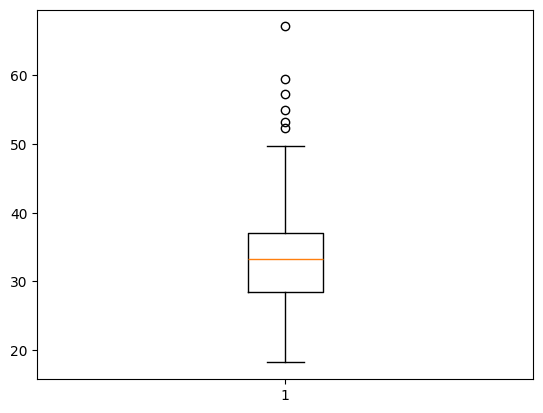

In [ ]:
plt.boxplot(data['BMI'])
plt.show()

In [ ]:
# not removing outliers from theses data.

In [ ]:
# all values are in numbers, so no encoding is needed.

In [ ]:
### Feature Target Splitting

In [7]:
x= data.drop('Outcome', axis=1)
y= data['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Linear Models- Logistic Regression, SVM

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_pred= log.predict(x_test)

In [ ]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[78, 21],
       [18, 37]])

In [ ]:
# 115 correct prediction, 39 wrong predictions.

In [ ]:
print('Accuracy Score =', accuracy_score(y_test, y_pred))
print('Precision Score =', precision_score(y_test, y_pred))
print('Recall Score =', recall_score(y_test, y_pred))
print('F1 Score =', f1_score(y_test, y_pred))

Accuracy Score = 0.7467532467532467
Precision Score = 0.6379310344827587
Recall Score = 0.6727272727272727
F1 Score = 0.6548672566371682


In [11]:
# Scaling the model
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc= sc.fit_transform(x_train)
x_test_sc= sc.fit_transform(x_test)

In [ ]:
model1= LogisticRegression()
model1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_sc= model1.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred_sc)

array([[78, 21],
       [18, 37]])

In [ ]:
# no change even after scaling

In [ ]:
accuracy_score(y_test, y_pred_sc)

0.7467532467532467

In [ ]:
precision_score(y_test, y_pred_sc)

0.6379310344827587

In [ ]:
f1_score(y_test, y_pred_sc)

0.6548672566371682

In [ ]:
recall_score(y_test, y_pred_sc)

0.6727272727272727

In [ ]:
# Non Linear Models- KNN

# kNN

In [ ]:
# Lazy Learner
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metrik_k= []
neighbors= np.arange(3,15)
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train, y_train)
  y_pred= classifier.predict(x_test)
  metrik_k.append(accuracy_score(y_test, y_pred))

In [ ]:
metrik_k

[0.6493506493506493,
 0.7077922077922078,
 0.6623376623376623,
 0.7272727272727273,
 0.6883116883116883,
 0.7467532467532467,
 0.7207792207792207,
 0.7662337662337663,
 0.7337662337662337,
 0.7792207792207793,
 0.7727272727272727,
 0.7727272727272727]

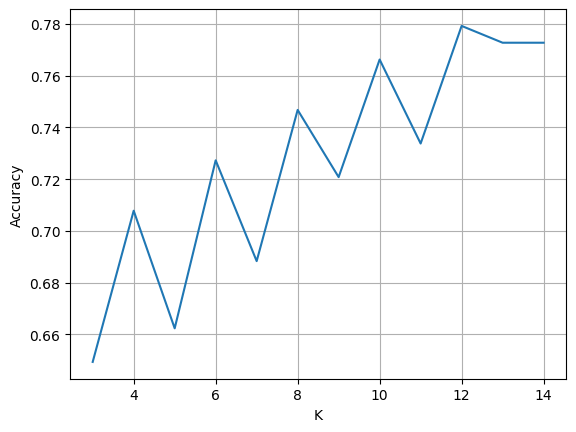

In [ ]:
plt.plot(neighbors, metrik_k)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
# n neighbors = 12 from the above graph

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=12)
classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=12)

In [ ]:
y_pred_knn= classifier.predict(x_test)
accuracy_score(y_test, y_pred_knn) # accuracy improved in kNN model as compared to Logistic Regression model

0.7792207792207793

In [ ]:
precision_score(y_test, y_pred_knn)

0.7560975609756098

In [ ]:
recall_score(y_test, y_pred_knn)

0.5636363636363636

In [ ]:
f1_score(y_test, y_pred_knn)

0.6458333333333334

In [ ]:
metrik_k= []
neighbors= np.arange(3,15)
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train_sc, y_train)
  y_pred= classifier.predict(x_test_sc)
  metrik_k.append(accuracy_score(y_test, y_pred))

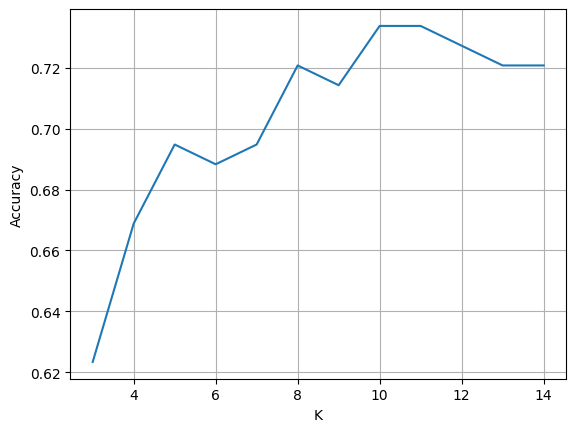

In [ ]:
plt.plot(neighbors, metrik_k)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show() # graph after scaling

In [ ]:
#n= 10 from above graph

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train_sc, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred_knn_sc= classifier.predict(x_test_sc)
accuracy_score(y_test, y_pred_knn_sc)

0.7337662337662337

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
sv= SVC()
sv.fit(x_train, y_train)
y_pred_sv= sv.predict(x_test)
accuracy_score(y_test, y_pred_sv) # much better accuracy

0.7662337662337663

In [ ]:
sv.fit(x_train_sc, y_train)
y_pred_sv_sc= sv.predict(x_test_sc)
accuracy_score(y_test, y_pred_sv_sc)

0.7402597402597403

In [ ]:
precision_score(y_test, y_pred_sv_sc)

0.6666666666666666

In [ ]:
recall_score(y_test, y_pred_sv_sc)

0.5454545454545454

In [ ]:
f1_score(y_test, y_pred_sv_sc)

0.6

In [ ]:
sv1= SVC(kernel='poly',degree=2)
sv1.fit(x_train, y_train)
y_pred_sv1= sv1.predict(x_test)
accuracy_score(y_test, y_pred_sv1)

0.7532467532467533

In [ ]:
precision_score(y_test, y_pred_sv1)

0.7142857142857143

In [ ]:
recall_score(y_test, y_pred_sv1)

0.5454545454545454

In [ ]:
f1_score(y_test, y_pred_sv1)

0.6122448979591837

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb= gnb.predict(x_test)
accuracy_score(y_test, y_pred_gnb)

0.7662337662337663

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)
y_pred_dt= clf.predict(x_test)
accuracy_score(y_test, y_pred_dt)

0.7142857142857143

In [ ]:
# in scaled data
clf.fit(x_train_sc, y_train)
y_pred_dt_sc= clf.predict(x_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.7077922077922078

# Decision Tree

In [ ]:
# Eager Learner

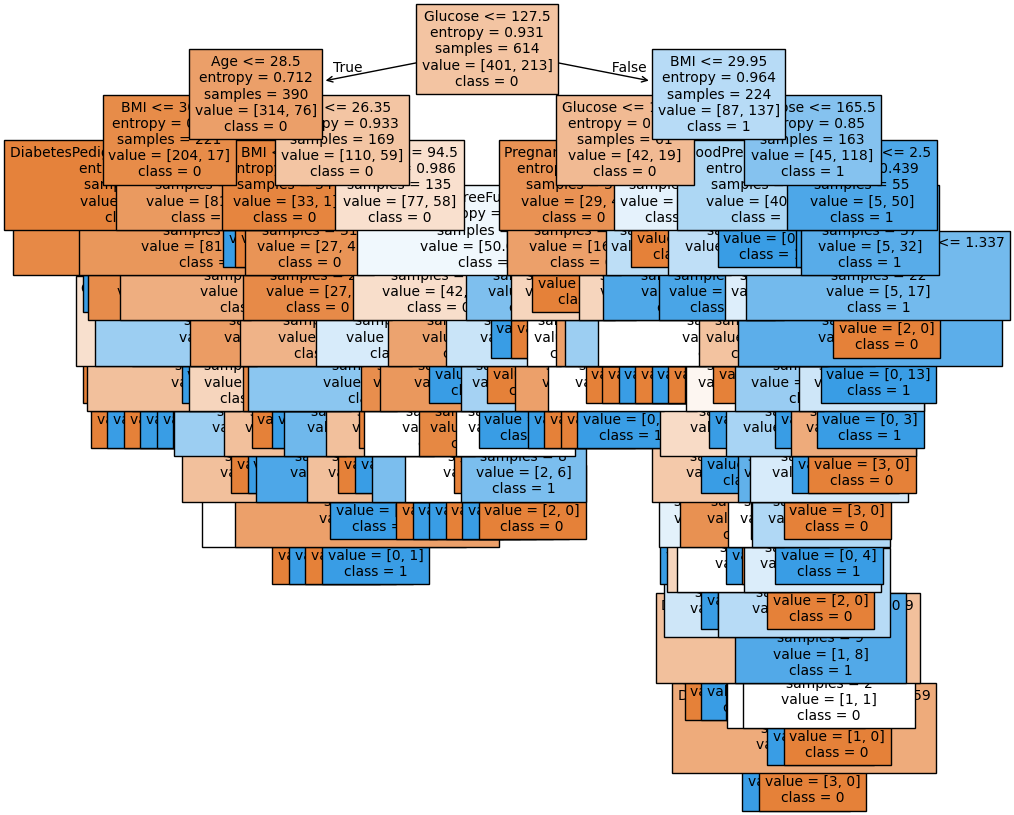

In [16]:
plt.figure(figsize=(10,10))
from sklearn import tree
tree.plot_tree(clf,feature_names= x_train.columns,class_names= clf.classes_.astype('str'),filled= True,fontsize=10)
plt.show()
